<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/homework-2/Homework_2_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
#### CREDITS: Wencen Wu ####
import numpy as np
import csv

w0, w1, w2 = 0, 0, 0
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x11,x22,y22 = [],[],[]


rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep

    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []

    # parameters
    r1 = rad + thk
    r2 = rad

    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)

        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

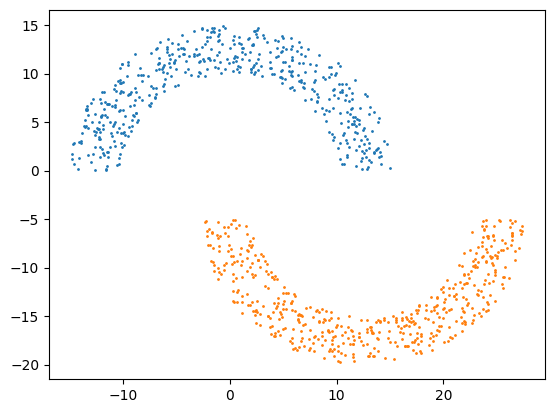

In [32]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

with open('synthetic_dataset.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['x1', 'x2', 'y'])  # Writing header
    for point in top:
        csv_writer.writerow([point[0], point[1], '1'])
    for point in bottom:
        csv_writer.writerow([point[0], point[1], '-1'])

In [33]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(int(values[2]))
    return x1,x2,y

In [34]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

In [35]:
def PLA():
    global w0, w1, w2
    for i in range(50):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified

In [36]:
file_read('synthetic_dataset.csv')
PLA()

Weights obtained from PLA --> w0:  31    w1: -2.561488478975374    w2:  50.03626098516298


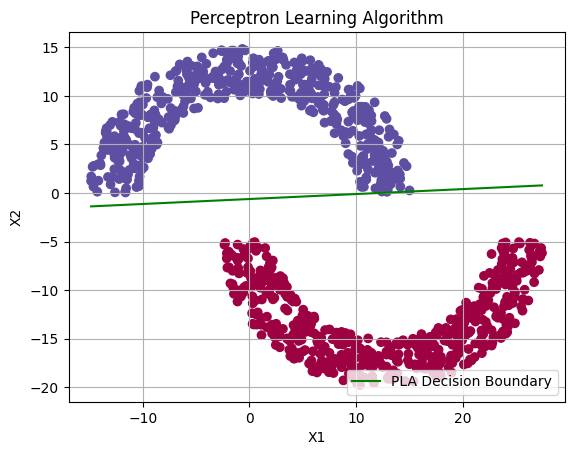

In [37]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()